<a href="https://www.kaggle.com/code/yucaib/urine-study?scriptVersionId=161955754" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Workflow:
----
#### bussiness understanding
----
####  data understanding
* exploratory data analysis and feature exrtraction(feature engineering)
---
#### (Outliers-Missing Values-Encoding-Feature Extraction)-Data Preparation
-----
#### modelling
-------
#### evaluation
-----

# Business Understanding
* The target, is to find out if the patient is may have a UTI or not. Basically it is a binary Classification.
* To do it, we need to prepare our data for to model understand.
* To make model accurate predictions, we will be doing; Feature Extractions from our RAW data.
* In real life, mostly in female, espacially in babies The UTI may occure.



# Data Understanding
* Age (The age of the patient) Note: Some patients are months old, so the age of these patients are preprocessed by dividing it by a hundred) e.g, 8 MONTHS OLD, 8/100 = 0.08
* Gender (The gender of the patient) Note: Either male or female
* Color (urine color)
* Transparency (urine transparency)
* Glucose (glucose is a type of sugar, and its presence in the urine can be an important indicator of certain health conditions)
* Protein (the presence of protein in the urine is one of the parameters examined to assess kidney function and detect potential)
* pH (the pH level measures the acidity or alkalinity of urine)
* Specific Gravity (urine specific gravity is a measure of the concentration of particles in urine compared to water)
* WBC (White Blood Cells) Note: Also known as leukocytes, white blood cells are a crucial part of the immune system
* RBC (Red Blood Cells) Note: RBC are responsible for carrying oxygen throughout the body
* Epithelial Cells (epithelial cells are cells that line the surfaces and cavities of the body, including the urinary tract)
* Mucous Threads (mucous threads are strands of mucus that can be present in urine)
* Amorphous Urates (amorphous urates are non-crystalline formations in the urine that consist of uric acid)
* Bacteria (presence of bacteria in the urine)
* Diagnosis (UTI Diagnosis) Note: Either NEGATIVE or POSITIVE
----------
*  1436 row 16 columns
* Diagnosis is Target value


* my utility scrpit
* https://www.kaggle.com/code/yucaib/cool-funcs/notebook

In [1]:
import cool_funcs as yucaib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [2]:
df= pd.read_csv('/kaggle/input/urinalysis-test-results/urinalysis_tests.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE
3,3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,NEGATIVE
4,4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,NEGATIVE


In [4]:
df.Diagnosis ## Target

0       NEGATIVE
1       NEGATIVE
2       NEGATIVE
3       NEGATIVE
4       NEGATIVE
          ...   
1431    NEGATIVE
1432    NEGATIVE
1433    NEGATIVE
1434    NEGATIVE
1435    NEGATIVE
Name: Diagnosis, Length: 1436, dtype: object

In [5]:
yucaib.check_df(df)

******************************************************
shape 
 (1436, 16)
******************************************************
dtypes 
 Unnamed: 0            int64
Age                 float64
Gender               object
Color                object
Transparency         object
Glucose              object
Protein              object
pH                  float64
Specific Gravity    float64
WBC                  object
RBC                  object
Epithelial Cells     object
Mucous Threads       object
Amorphous Urates     object
Bacteria             object
Diagnosis            object
dtype: object
******************************************************
tail 
       Unnamed: 0    Age  Gender        Color Transparency   Glucose   Protein  \
1431        1431   0.06    MALE       YELLOW        CLEAR  NEGATIVE  NEGATIVE   
1432        1432  42.00    MALE       YELLOW        CLEAR  NEGATIVE  NEGATIVE   
1433        1433  47.00  FEMALE  DARK YELLOW        CLEAR  NEGATIVE     TRACE   
1434        14

In [6]:
df.fillna('LIGHT YELLOW')
df['Diagnosis'] = df['Diagnosis'].map({'POSITIVE': 1, 'NEGATIVE': 0})
df.drop(columns='Unnamed: 0',inplace=True,axis=1) # we already have index column, we don't need another one

In [7]:
cat_cols,num_cols,cat_but_car = yucaib.grab_col_names(dataframe=df)

Observations: 1436
Variables: 15
cat_cols: 12
cat_but_car: 2
num_cols: 1
num_but_cat: 3


In [8]:
yucaib.grab_col_names(dataframe=df)

Observations: 1436
Variables: 15
cat_cols: 12
cat_but_car: 2
num_cols: 1
num_but_cat: 3


(['Gender',
  'Color',
  'Transparency',
  'Glucose',
  'Protein',
  'Epithelial Cells',
  'Mucous Threads',
  'Amorphous Urates',
  'Bacteria',
  'pH',
  'Specific Gravity',
  'Diagnosis'],
 ['Age'],
 ['WBC', 'RBC'])

In [9]:
cat_but_car

['WBC', 'RBC']

In [10]:
df.WBC.nunique()

75

In [11]:
df.RBC.nunique()

53

In [12]:
num_cols

['Age']

In [13]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

In [14]:
binary_cols

['Gender']

In [15]:
cat_cols,num_cols,cat_but_car = yucaib.grab_col_names(dataframe=df)

Observations: 1436
Variables: 15
cat_cols: 12
cat_but_car: 2
num_cols: 1
num_but_cat: 3


# As far find out;
* No missing values in the dataset.
* Only 2 binary cols
* There is high Cardinalitiy in two variables "WBO" and 'RBO' but I think I will turn them in to binary categoric.
* 2 numeric columns but 'Unnamed' is a index column therefore I dropped it
* NOTE: IN THE cat_cols there are numeric columns that actually reperesents a categoric column! like Ph and Specific Gravity in this dataset

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1436.0,27.207521,23.460032,0.010,6.00,23.000,45.00,92.00
pH,1436.0,6.052925,0.598475,5.000,6.00,6.000,6.50,8.00
Specific Gravity,1436.0,1.015850,0.007285,1.005,1.01,1.015,1.02,1.03
Diagnosis,1436.0,0.056407,0.230786,0.000,0.00,0.000,0.00,1.00


In [17]:
df['Specific Gravity'].unique() # it is more like a label, it seems as numeric but actually it is a label/class ,categoric.

array([1.01 , 1.03 , 1.02 , 1.025, 1.005, 1.015])

In [18]:
df.Age.median()

23.0

In [19]:
num_cols

['Age']

In [20]:
df.pH.unique() # it is more like a label, it seems as numeric but actually it is a label/class ,categoric.

array([5. , 6. , 7. , 7.5, 6.5, 8. ])

In [21]:
yucaib.num_summary(df,'Age') # summary of numeric columns (there's only one actual numeric column 'Age')

count    1436.000000
mean       27.207521
std        23.460032
min         0.010000
5%          1.000000
10%         2.000000
20%         4.000000
30%         7.000000
40%        14.000000
50%        23.000000
60%        29.000000
70%        38.000000
80%        51.000000
90%        64.000000
95%        71.000000
99%        82.000000
max        92.000000
Name: Age, dtype: float64
****************************


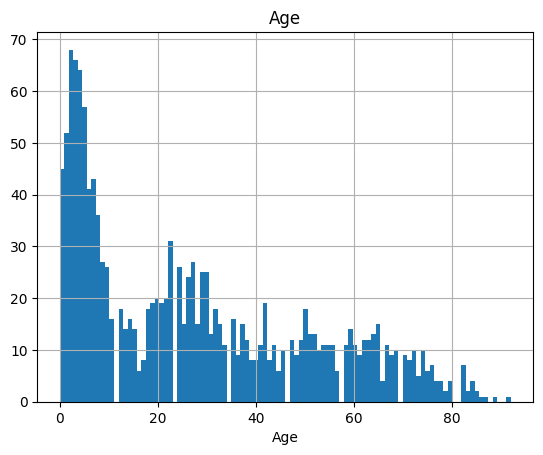

In [22]:
df['Age'].hist(bins=100)
plt.xlabel('Age')
plt.title('Age')
plt.show()

In [23]:
for col in cat_cols:
    yucaib.cat_summary(df,col)
    print('##########################3') # Categoric columns summary (including the numeric columns indeed categoric columns) 

        Gender      Ratio
Gender                   
FEMALE     816  56.824513
MALE       620  43.175487
##########################3
                Color      Ratio
Color                           
YELLOW            710  49.442897
LIGHT YELLOW      341  23.746518
DARK YELLOW       248  17.270195
STRAW             116   8.077994
AMBER              15   1.044568
BROWN               1   0.069638
RED                 1   0.069638
REDDISH             1   0.069638
REDDISH YELLOW      1   0.069638
LIGHT RED           1   0.069638
##########################3
               Transparency      Ratio
Transparency                          
CLEAR                  1124  78.272981
SLIGHTLY HAZY           172  11.977716
HAZY                    104   7.242340
TURBID                   20   1.392758
CLOUDY                   16   1.114206
##########################3
          Glucose      Ratio
Glucose                     
NEGATIVE     1349  93.941504
2+             24   1.671309
3+             23   1.60167

In [24]:
yucaib.check_outlier(df,'Age')

False

# Data Prepration
*  NEXT : I will be doing ; Feature Extraction, Missing Value Check, Outlier Check(already done above, For numerics), Low Ratio Check for each categoric variable's label's (already done above).
--------------
* numeric summary : Age has the most person in the 0-20 intervial, I will be grouping them as, 0-20 , 21-35, 40-age>40
-----------------------
* categorical summary ;
* Specific gravity; "1.005+ 1.010+ 1.015 | 1.020 + 1.025 + 1.030" I will be changing this in to 2 categorical class.
* pH ; 5<=ph<6, 6=< ph<6.5, 6.5=< ph < =8 , changing it in to 3 categorical
* Bacteria ; FEW  + MODERATE   +PLENTY  +OCCASIONAL  +LOADED   (will concate them in to one so there will be only) Rare and MoreThanRare
* Amorphous Urates ; I will concate except NoneSeen and there will be two labels, None-seen and Seen.
* Mucous Threads: will be created as ; NoneSeen-Rare-More
* Epithelial Cells; (Rare+NoneSeen) | Rest
* Protein ; Negative + Positive(I will concate rest of them, in positive)
* Glucose: NoneSeen + Seen
* Transparency : Clear and Hazy
* Color : Light Yellow + Yellow + Dark Yellow(concate rest of them in darker yellow)
* gender : it will remain still
-----------
* NOTE : I will be doing my feature extraction according to those statments. These are my very comments. maybe the 'reddish' urine means diseaster and combining it with dark yellow is not something so cleaver in the first look but the dataset we have right now is kinda makes me doing this. We need data's to generalize.
----
* NOTE: I may be dropping some of the rows that diagnoses are True, because the distirubiton of the True and False in Diagnose variable is : %94 percent to %6 percent I don't believe that a modelling with such a unstable target column would just take us somewhere we don't want to be. I'm aminig to make this percent to %60 to %30 at least.

# Feature extraction

In [25]:
df['Specific Gravity'].unique()

array([1.01 , 1.03 , 1.02 , 1.025, 1.005, 1.015])

1. "1.005+ 1.010+ 1.015 | 1.020 + 1.025 + 1.030"

In [26]:
df.loc[(df['Specific Gravity'] == 1.005),'NEW_GRAVITY']= 'down_normal'
df.loc[(df['Specific Gravity'] == 1.010),'NEW_GRAVITY']= 'down_normal'
df.loc[(df['Specific Gravity'] == 1.015),'NEW_GRAVITY']= 'down_normal'
df.loc[(df['Specific Gravity'] == 1.020),'NEW_GRAVITY']= 'down_normal'
df.loc[(df['Specific Gravity'] == 1.025),'NEW_GRAVITY']= 'up_normal'
df.loc[(df['Specific Gravity'] == 1.030),'NEW_GRAVITY']= 'up_normal'

pH ; 5<=ph<6, 6=< ph<6.5, 6.5=< ph < =8 , changing it in to 3 categorical

In [27]:
df.loc[(df['pH']<6),'NEW_PH'] = 'acidic'
df.loc[(6<=df['pH'])& (df['pH']<6.5),'NEW_PH'] = 'less_acidic'
df.loc[(6.5<=df['pH'])& (df['pH']<=8),'NEW_PH'] = 'alkaline'

Bacteria ; FEW + MODERATE +PLENTY +OCCASIONAL +LOADED (will concate them in to one so there will be only) Rare and MoreThanRare

In [28]:
df.loc[(df['Bacteria'] == 'FEW'),'NEW_BACTERİA']= 'MorethanRare'
df.loc[(df['Bacteria'] == 'MODERATE'),'NEW_BACTERİA']= 'MorethanRare'
df.loc[(df['Bacteria'] == 'OCCASIONAL'),'NEW_BACTERİA']= 'MorethanRare'
df.loc[(df['Bacteria'] == 'PLENTY'),'NEW_BACTERİA']= 'MorethanRare'
df.loc[(df['Bacteria'] == 'LOADED'),'NEW_BACTERİA']= 'MorethanRare'
####
df.loc[(df['Bacteria'] == 'RARE'),'NEW_BACTERİA']= 'Rare'

In [29]:
df.head()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis,NEW_GRAVITY,NEW_PH,NEW_BACTERİA
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,0,down_normal,acidic,MorethanRare
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,RARE,FEW,FEW,MODERATE,0,up_normal,acidic,MorethanRare
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,RARE,FEW,MODERATE,RARE,0,up_normal,acidic,Rare
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,RARE,RARE,NONE SEEN,FEW,0,down_normal,less_acidic,MorethanRare
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,RARE,RARE,NONE SEEN,FEW,0,up_normal,less_acidic,MorethanRare


Amorphous Urates ; I will concate except NoneSeen and there will be two labels, None-seen and Seen.

In [30]:
df['Amorphous Urates'].unique()

array(['NONE SEEN', 'FEW', 'MODERATE', 'PLENTY', 'RARE', 'OCCASIONAL'],
      dtype=object)

In [31]:
df['NEW_AMORPHOUS_URATES'] = df['Amorphous Urates'].apply(lambda x: 'NoneSeen' if x == 'NONE SEEN' else 'Seen')

In [32]:
df.NEW_AMORPHOUS_URATES.unique()

array(['NoneSeen', 'Seen'], dtype=object)

Mucous Threads: will be created as ; NoneSeen-Rare+Few-Frequent

In [33]:
df['Mucous Threads'].unique()

array(['RARE', 'FEW', 'NONE SEEN', 'MODERATE', 'PLENTY', 'OCCASIONAL'],
      dtype=object)

In [34]:
df['NEW_MUCOUSE'] = df['Mucous Threads'].apply(lambda x: 'NoneSeen' if x == 'NONE SEEN' else 'Rare' if x in ['RARE', 'FEW'] else 'Frequent')

Epithelial Cells; (Rare+NoneSeen) | Rest

In [35]:
df['Epithelial Cells'].unique()

array(['OCCASIONAL', 'RARE', 'PLENTY', 'MODERATE', 'FEW', 'NONE SEEN',
       'LOADED'], dtype=object)

In [36]:
df['NEW_EPITHELIAL'] = df['Epithelial Cells'].apply(lambda x: 'Rare' if x in ['NONE SEEN', 'RARE'] else 'Frequent')

In [37]:
df.NEW_EPITHELIAL.unique()

array(['Frequent', 'Rare'], dtype=object)

Protein ; Negative + Positive(I will concate rest of them, in positive)

In [38]:
df.Protein.unique()

array(['NEGATIVE', '1+', 'TRACE', '2+', '3+'], dtype=object)

In [39]:
df['NEW_PROTEIN'] = df['Protein'].apply(lambda x: 'Negative' if x=='NEGATIVE' else 'Positive')

In [40]:
df['NEW_PROTEIN'].unique()

array(['Negative', 'Positive'], dtype=object)

Glucose: NoneSeen + Seen

In [41]:
df.Glucose.unique()

array(['NEGATIVE', '3+', '1+', 'TRACE', '4+', '2+'], dtype=object)

In [42]:
df['NEW_GLUCOSE'] = df['Glucose'].apply(lambda x: 'Negative' if x =='NEGATIVE' else 'Positive' )

In [43]:
df.NEW_GLUCOSE.unique()

array(['Negative', 'Positive'], dtype=object)

Transparency : Clear and Hazy

In [44]:
df.Transparency.unique()

array(['CLEAR', 'SLIGHTLY HAZY', 'CLOUDY', 'HAZY', 'TURBID'], dtype=object)

In [45]:
df['NEW_TRANSPERENCY'] = df['Transparency'].apply(lambda x: 'Clear' if x=='CLEAR' else 'notClear')

Color : Light Yellow + Yellow + Dark Yellow(concate rest of them in darker yellow)

In [46]:
df.Color.unique()

array(['LIGHT YELLOW', 'DARK YELLOW', 'BROWN', 'YELLOW', 'AMBER', 'STRAW',
       'RED', 'REDDISH', 'REDDISH YELLOW', 'LIGHT RED', nan], dtype=object)

In [47]:
df['NEW_COLOR'] = df['Color'].apply(lambda x: 'LightYellow' if x == 'LIGHT YELLOW' else 'Yellow' if x =='YELLOW' else 'DarkYellow')

AGE X Variabels 

In [48]:
df.head()

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,...,NEW_GRAVITY,NEW_PH,NEW_BACTERİA,NEW_AMORPHOUS_URATES,NEW_MUCOUSE,NEW_EPITHELIAL,NEW_PROTEIN,NEW_GLUCOSE,NEW_TRANSPERENCY,NEW_COLOR
0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.010,1-3,0-2,...,down_normal,acidic,MorethanRare,NoneSeen,Rare,Frequent,Negative,Negative,Clear,LightYellow
1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.030,1-3,0-2,...,up_normal,acidic,MorethanRare,Seen,Rare,Rare,Positive,Negative,notClear,DarkYellow
2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.030,0-3,0-2,...,up_normal,acidic,Rare,Seen,Rare,Rare,Positive,Negative,notClear,LightYellow
3,77.0,MALE,BROWN,CLOUDY,NEGATIVE,1+,6.0,1.020,5-8,LOADED,...,down_normal,less_acidic,MorethanRare,NoneSeen,Rare,Rare,Positive,Negative,notClear,DarkYellow
4,29.0,FEMALE,YELLOW,HAZY,NEGATIVE,TRACE,6.0,1.025,1-4,0-2,...,up_normal,less_acidic,MorethanRare,NoneSeen,Rare,Rare,Positive,Negative,notClear,Yellow


In [49]:
df['Age'].quantile([0,0.01,0.1,0.20,0.25,0.30,0.40,0.50,0.75,0.90,0.95,0.99])

0.00     0.0100
0.01     0.0535
0.10     2.0000
0.20     4.0000
0.25     6.0000
0.30     7.0000
0.40    14.0000
0.50    23.0000
0.75    45.0000
0.90    64.0000
0.95    71.0000
0.99    82.0000
Name: Age, dtype: float64

In [50]:
df.Age.min()

0.01

In [51]:
df.Age

0       76.00
1        9.00
2       12.00
3       77.00
4       29.00
        ...  
1431     0.06
1432    42.00
1433    47.00
1434    57.00
1435     3.00
Name: Age, Length: 1436, dtype: float64

we will be assuming every people is at least 1 year old, even if they are just a few month old 

In [52]:
df['Age']=df['Age'].apply(lambda x : 1 if x<1 else x)

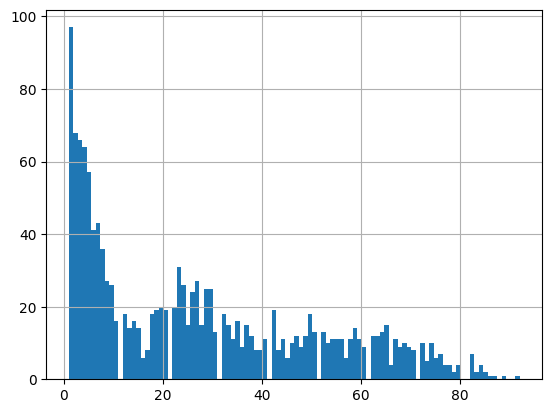

In [53]:
df.Age.hist(bins=100);

Age has the most person in the 0-20 intervial, I will be grouping them as, 0-10 , 11-25, 25-40,age>40

# Feature Extraction

In [54]:
df.Gender.unique()

array(['FEMALE', 'MALE'], dtype=object)

In [55]:
df.NEW_PH.unique()

array(['acidic', 'less_acidic', 'alkaline'], dtype=object)

In [56]:
df.loc[(df['Age']<=10)& (df['Gender'] =='FEMALE') & (df['pH']<6),'NEW_AGE_GENDER_PH']='ChildFemalePH_acidic'
df.loc[(df['Age']<=10)& (df['Gender'] =='MALE')  & (df['pH']<6),'NEW_AGE_GENDER_PH']='ChildMalePH_acidic'

df.loc[(df['Age'] > 10) & (df['Age'] <= 25)& (df['Gender'] =='FEMALE') & (df['pH']<6),'NEW_AGE_GENDER_PH']='YoungFemalePH_acidic'
df.loc[(df['Age'] > 10) & (df['Age'] <= 25)& (df['Gender'] =='MALE')  & (df['pH']<6),'NEW_AGE_GENDER_PH']='YoungMalePH_acidic'

df.loc[(df['Age'] > 25) & (df['Age'] <= 40)& (df['Gender'] =='FEMALE')  & (df['pH']<6),'NEW_AGE_GENDER_PH']='AdultFemalePH_acidic'
df.loc[(df['Age'] > 25) & (df['Age'] <= 40)& (df['Gender'] =='MALE')  & (df['pH']<6),'NEW_AGE_GENDER_PH']='AdultMalePH_acidic'

df.loc[(40<df['Age'])& (df['Gender'] =='FEMALE')  & (df['pH']<6),'NEW_AGE_GENDER_PH']='SeniorFemalePH_acidic'
df.loc[(40<df['Age'])& (df['Gender'] =='MALE')  & (df['pH']<6),'NEW_AGE_GENDER_PH']='SeniormalePH_acidic'



df.loc[(df['Age']<=10)& (df['Gender'] =='FEMALE') & (df['pH'] >= 6) & (df['pH'] < 6.5),'NEW_AGE_GENDER_PH']='ChildFemalePH_lessacidic'
df.loc[(df['Age']<=10)& (df['Gender'] =='MALE')  & (df['pH'] >= 6) & (df['pH'] < 6.5),'NEW_AGE_GENDER_PH']='ChildMalePH_lessacidic'

df.loc[(df['Age'] > 10) & (df['Age'] <= 25)& (df['Gender'] =='FEMALE') & (df['pH'] >= 6) & (df['pH'] < 6.5),'NEW_AGE_GENDER_PH']='YoungFemalePH_lessacidic'
df.loc[(df['Age'] > 10) & (df['Age'] <= 25)& (df['Gender'] =='MALE')  & (df['pH'] >= 6) & (df['pH'] < 6.5),'NEW_AGE_GENDER_PH']='YoungMalePH_lessacidic'

df.loc[(df['Age'] > 25) & (df['Age'] <= 40)& (df['Gender'] =='FEMALE')  & (df['pH'] >= 6) & (df['pH'] < 6.5),'NEW_AGE_GENDER_PH']='AdultFemalePH_lessacidic'
df.loc[(df['Age'] > 25) & (df['Age'] <= 40)& (df['Gender'] =='MALE')  & (df['pH'] >= 6) & (df['pH'] < 6.5),'NEW_AGE_GENDER_PH']='AdultMalePH_lessacidic'

df.loc[(40<df['Age'])& (df['Gender'] =='FEMALE')  & (df['pH'] >= 6) & (df['pH'] < 6.5),'NEW_AGE_GENDER_PH']='SeniorFemalePH_lessacidic'
df.loc[(40<df['Age'])& (df['Gender'] =='MALE')  & (df['pH'] >= 6) & (df['pH'] < 6.5),'NEW_AGE_GENDER_PH']='SeniormalePH_lessacidic'



df.loc[(df['Age']<=10)& (df['Gender'] =='FEMALE') & (6.5<=df['pH']),'NEW_AGE_GENDER_PH']='ChildFemalePH_alkaline'
df.loc[(df['Age']<=10)& (df['Gender'] =='MALE')  & (6.5<=df['pH']),'NEW_AGE_GENDER_PH']='ChildMalePH_alkaline'

df.loc[(df['Age'] > 10) & (df['Age'] <= 25)& (df['Gender'] =='FEMALE') & (6.5<=df['pH']),'NEW_AGE_GENDER_PH']='YoungFemalePH_alkaline'
df.loc[(df['Age'] > 10) & (df['Age'] <= 25)& (df['Gender'] =='MALE')  & (6.5<=df['pH']),'NEW_AGE_GENDER_PH']='YoungMalePH_alkaline'

df.loc[(df['Age'] > 25) & (df['Age'] <= 40)& (df['Gender'] =='FEMALE')  & (6.5<=df['pH']),'NEW_AGE_GENDER_PH']='AdultFemalePH_alkaline'
df.loc[(df['Age'] > 25) & (df['Age'] <= 40)& (df['Gender'] =='MALE')  & (6.5<=df['pH']),'NEW_AGE_GENDER_PH']='AdultMalePH_alkaline'

df.loc[(df['Age'] > 40)& (df['Gender'] =='FEMALE')  & (6.5<=df['pH']),'NEW_AGE_GENDER_PH']='SeniorFemalePH_alkaline'
df.loc[(df['Age'] > 40)& (df['Gender'] =='MALE')  & (6.5<=df['pH']),'NEW_AGE_GENDER_PH']='SeniormalePH_alkaline'

In [57]:
len(df.NEW_AGE_GENDER_PH.unique())

24

In [58]:
for col in df.columns:
    print(col, df[col].unique())
    print("*******************")

Age [76.  9. 12. 77. 29. 50.  3. 23.  8.  2. 65. 62. 18. 31. 44. 32. 26.  1.
 30. 41. 84. 83. 27. 37.  5. 47. 21. 36. 24. 80.  4. 67. 35. 42. 71. 61.
 70. 22. 40. 51. 48. 49. 72. 59. 15. 54. 13. 74. 14. 52. 19. 58. 17. 60.
  7. 68. 66. 39.  6. 53. 28. 10. 64. 56. 63. 25. 38. 46. 34. 20. 78. 43.
 11. 45. 33. 69. 16. 82. 57. 75. 73. 55. 85. 79. 87. 92. 89. 86.]
*******************
Gender ['FEMALE' 'MALE']
*******************
Color ['LIGHT YELLOW' 'DARK YELLOW' 'BROWN' 'YELLOW' 'AMBER' 'STRAW' 'RED'
 'REDDISH' 'REDDISH YELLOW' 'LIGHT RED' nan]
*******************
Transparency ['CLEAR' 'SLIGHTLY HAZY' 'CLOUDY' 'HAZY' 'TURBID']
*******************
Glucose ['NEGATIVE' '3+' '1+' 'TRACE' '4+' '2+']
*******************
Protein ['NEGATIVE' '1+' 'TRACE' '2+' '3+']
*******************
pH [5.  6.  7.  7.5 6.5 8. ]
*******************
Specific Gravity [1.01  1.03  1.02  1.025 1.005 1.015]
*******************
WBC ['1-3' '0-3' '5-8' '1-4' '3-5' '70-75' '0-2' '1-2' '2-4' '6-8' '8-10'
 '10-12' '0-1' '4-

In [59]:
df.isnull().sum() # last check before scaling if there's any mistake in feature engineering

Age                     0
Gender                  0
Color                   1
Transparency            0
Glucose                 0
Protein                 0
pH                      0
Specific Gravity        0
WBC                     0
RBC                     0
Epithelial Cells        0
Mucous Threads          0
Amorphous Urates        0
Bacteria                0
Diagnosis               0
NEW_GRAVITY             0
NEW_PH                  0
NEW_BACTERİA            0
NEW_AMORPHOUS_URATES    0
NEW_MUCOUSE             0
NEW_EPITHELIAL          0
NEW_PROTEIN             0
NEW_GLUCOSE             0
NEW_TRANSPERENCY        0
NEW_COLOR               0
NEW_AGE_GENDER_PH       0
dtype: int64

RBC and WBC

# NOTE:
* I will be dropping WBC and RBC columns due to high cardinality, I did some research on it, definetly it is really important variable for such a stuation but in our data set the values are not in a standart expression, also I couldn't achive to convert them in to something that machine would understand.
* np.sort(df.RBC.unique()) 
* ['0-0', '0-1', '0-2', '0-3', '0-4', '1-2', '1-3', '1-4', '1-5',
       '1-6', '10-12', '11-13', '12-15', '12-17', '13-15', '16-18',
       '18-20', '18-21', '18-22', '18-25', '2-3', '2-4', '2-5', '2-6',
       '20-22', '20-25', '22-24', '23-25', '25-30', '25-32', '28-30',
       '3-5', '3-6', '30-35', '36-38', '38-40', '4-10', '4-6', '48-62',
       '5-10', '5-7', '5-8', '6-14', '6-8', '8-10', '8-12', '85-87',
       '9-11', '9-12', '>100', '>50', 'LOADED', 'TNTC'], dtype=object)

In [60]:
df.drop('WBC', inplace=True,axis =1)
df.drop('RBC',inplace=True , axis =1)

In [61]:
delete_cols =['Color','Bacteria','Specific Gravity','pH','Amorphous Urates',
             'Mucous Threads','Epithelial Cells','Protein','Transparency', 'Glucose']
df.drop(delete_cols ,axis=1, inplace=True)

In [62]:
df.columns= [col.upper() for col in df.columns]

In [63]:
cat_cols,num_cols,cat_but_car = yucaib.grab_col_names(df)

Observations: 1436
Variables: 14
cat_cols: 12
cat_but_car: 1
num_cols: 1
num_but_cat: 1


In [64]:
df.columns

Index(['AGE', 'GENDER', 'DIAGNOSIS', 'NEW_GRAVITY', 'NEW_PH', 'NEW_BACTERİA',
       'NEW_AMORPHOUS_URATES', 'NEW_MUCOUSE', 'NEW_EPITHELIAL', 'NEW_PROTEIN',
       'NEW_GLUCOSE', 'NEW_TRANSPERENCY', 'NEW_COLOR', 'NEW_AGE_GENDER_PH'],
      dtype='object')

In [65]:
num_cols

['AGE']

In [66]:
cat_cols

['GENDER',
 'NEW_GRAVITY',
 'NEW_PH',
 'NEW_BACTERİA',
 'NEW_AMORPHOUS_URATES',
 'NEW_MUCOUSE',
 'NEW_EPITHELIAL',
 'NEW_PROTEIN',
 'NEW_GLUCOSE',
 'NEW_TRANSPERENCY',
 'NEW_COLOR',
 'DIAGNOSIS']

In [67]:
df.columns

Index(['AGE', 'GENDER', 'DIAGNOSIS', 'NEW_GRAVITY', 'NEW_PH', 'NEW_BACTERİA',
       'NEW_AMORPHOUS_URATES', 'NEW_MUCOUSE', 'NEW_EPITHELIAL', 'NEW_PROTEIN',
       'NEW_GLUCOSE', 'NEW_TRANSPERENCY', 'NEW_COLOR', 'NEW_AGE_GENDER_PH'],
      dtype='object')

# Label Encoding
* for the binary columns

In [68]:
binary_cols = [col for col in df.columns if df[col].dtype not in [int,float] and df[col].nunique() == 2]
binary_cols = [col for col in binary_cols if 'DIAGNOSIS' not in col]

In [69]:
binary_cols

['GENDER',
 'NEW_GRAVITY',
 'NEW_BACTERİA',
 'NEW_AMORPHOUS_URATES',
 'NEW_EPITHELIAL',
 'NEW_PROTEIN',
 'NEW_GLUCOSE',
 'NEW_TRANSPERENCY']

In [70]:
for col in binary_cols:
    yucaib.label_encoder(df,col)

In [71]:
df.shape

(1436, 14)

# One Hot Encoding

In [72]:
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [73]:
ohe_cols.append('NEW_AGE_GENDER_PH')

In [74]:
df= yucaib.one_hot_encoder(df,ohe_cols)

In [75]:
df.shape

(1436, 39)

In [76]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [77]:
df.head()

,AGE,GENDER,DIAGNOSIS,NEW_GRAVITY,NEW_BACTERİA,NEW_AMORPHOUS_URATES,NEW_EPITHELIAL,NEW_PROTEIN,NEW_GLUCOSE,NEW_TRANSPERENCY,NEW_PH_alkaline,NEW_PH_less_acidic,NEW_MUCOUSE_NoneSeen,NEW_MUCOUSE_Rare,NEW_COLOR_LightYellow,NEW_COLOR_Yellow,NEW_AGE_GENDER_PH_AdultFemalePH_alkaline,NEW_AGE_GENDER_PH_AdultFemalePH_lessacidic,NEW_AGE_GENDER_PH_AdultMalePH_acidic,NEW_AGE_GENDER_PH_AdultMalePH_alkaline,NEW_AGE_GENDER_PH_AdultMalePH_lessacidic,NEW_AGE_GENDER_PH_ChildFemalePH_acidic,NEW_AGE_GENDER_PH_ChildFemalePH_alkaline,NEW_AGE_GENDER_PH_ChildFemalePH_lessacidic,NEW_AGE_GENDER_PH_ChildMalePH_acidic,NEW_AGE_GENDER_PH_ChildMalePH_alkaline,NEW_AGE_GENDER_PH_ChildMalePH_lessacidic,NEW_AGE_GENDER_PH_SeniorFemalePH_acidic,NEW_AGE_GENDER_PH_SeniorFemalePH_alkaline,NEW_AGE_GENDER_PH_SeniorFemalePH_lessacidic,NEW_AGE_GENDER_PH_SeniormalePH_acidic,NEW_AGE_GENDER_PH_SeniormalePH_alkaline,NEW_AGE_GENDER_PH_SeniormalePH_lessacidic,NEW_AGE_GENDER_PH_YoungFemalePH_acidic,NEW_AGE_GENDER_PH_YoungFemalePH_alkaline,NEW_AGE_GENDER_PH_YoungFemalePH_lessacidic,NEW_AGE_GENDER_PH_YoungMalePH_acidic,NEW_AGE_GENDER_PH_YoungMalePH_alkaline,NEW_AGE_GENDER_PH_YoungMalePH_lessacidic
0,76.0,0,0,0,0,0,0,0,0,0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,9.0,1,0,1,0,1,1,1,0,1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,12.0,1,0,1,1,1,1,1,0,1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,77.0,1,0,0,0,0,1,1,0,1,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,29.0,0,0,1,0,0,1,1,0,1,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [78]:
cat_cols, num_cols, cat_but_car = yucaib.grab_col_names(df)

Observations: 1436
Variables: 39
cat_cols: 38
cat_but_car: 0
num_cols: 1
num_but_cat: 38


In [79]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts()/ len(df) < 0.01).any(axis=None)]

In [80]:
useless_cols

['NEW_AGE_GENDER_PH_AdultMalePH_acidic',
 'NEW_AGE_GENDER_PH_AdultMalePH_alkaline',
 'NEW_AGE_GENDER_PH_YoungFemalePH_acidic',
 'NEW_AGE_GENDER_PH_YoungMalePH_acidic']

In [81]:
df.drop(useless_cols, axis= 1 , inplace= True)

In [82]:
df.head()

,AGE,GENDER,DIAGNOSIS,NEW_GRAVITY,NEW_BACTERİA,NEW_AMORPHOUS_URATES,NEW_EPITHELIAL,NEW_PROTEIN,NEW_GLUCOSE,NEW_TRANSPERENCY,NEW_PH_alkaline,NEW_PH_less_acidic,NEW_MUCOUSE_NoneSeen,NEW_MUCOUSE_Rare,NEW_COLOR_LightYellow,NEW_COLOR_Yellow,NEW_AGE_GENDER_PH_AdultFemalePH_alkaline,NEW_AGE_GENDER_PH_AdultFemalePH_lessacidic,NEW_AGE_GENDER_PH_AdultMalePH_lessacidic,NEW_AGE_GENDER_PH_ChildFemalePH_acidic,NEW_AGE_GENDER_PH_ChildFemalePH_alkaline,NEW_AGE_GENDER_PH_ChildFemalePH_lessacidic,NEW_AGE_GENDER_PH_ChildMalePH_acidic,NEW_AGE_GENDER_PH_ChildMalePH_alkaline,NEW_AGE_GENDER_PH_ChildMalePH_lessacidic,NEW_AGE_GENDER_PH_SeniorFemalePH_acidic,NEW_AGE_GENDER_PH_SeniorFemalePH_alkaline,NEW_AGE_GENDER_PH_SeniorFemalePH_lessacidic,NEW_AGE_GENDER_PH_SeniormalePH_acidic,NEW_AGE_GENDER_PH_SeniormalePH_alkaline,NEW_AGE_GENDER_PH_SeniormalePH_lessacidic,NEW_AGE_GENDER_PH_YoungFemalePH_alkaline,NEW_AGE_GENDER_PH_YoungFemalePH_lessacidic,NEW_AGE_GENDER_PH_YoungMalePH_alkaline,NEW_AGE_GENDER_PH_YoungMalePH_lessacidic
0,76.0,0,0,0,0,0,0,0,0,0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,9.0,1,0,1,0,1,1,1,0,1,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,12.0,1,0,1,1,1,1,1,0,1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,77.0,1,0,0,0,0,1,1,0,1,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,29.0,0,0,1,0,0,1,1,0,1,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Standartization

In [83]:
num_cols

['AGE']

In [84]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [85]:
df.head()

,AGE,GENDER,DIAGNOSIS,NEW_GRAVITY,NEW_BACTERİA,NEW_AMORPHOUS_URATES,NEW_EPITHELIAL,NEW_PROTEIN,NEW_GLUCOSE,NEW_TRANSPERENCY,NEW_PH_alkaline,NEW_PH_less_acidic,NEW_MUCOUSE_NoneSeen,NEW_MUCOUSE_Rare,NEW_COLOR_LightYellow,NEW_COLOR_Yellow,NEW_AGE_GENDER_PH_AdultFemalePH_alkaline,NEW_AGE_GENDER_PH_AdultFemalePH_lessacidic,NEW_AGE_GENDER_PH_AdultMalePH_lessacidic,NEW_AGE_GENDER_PH_ChildFemalePH_acidic,NEW_AGE_GENDER_PH_ChildFemalePH_alkaline,NEW_AGE_GENDER_PH_ChildFemalePH_lessacidic,NEW_AGE_GENDER_PH_ChildMalePH_acidic,NEW_AGE_GENDER_PH_ChildMalePH_alkaline,NEW_AGE_GENDER_PH_ChildMalePH_lessacidic,NEW_AGE_GENDER_PH_SeniorFemalePH_acidic,NEW_AGE_GENDER_PH_SeniorFemalePH_alkaline,NEW_AGE_GENDER_PH_SeniorFemalePH_lessacidic,NEW_AGE_GENDER_PH_SeniormalePH_acidic,NEW_AGE_GENDER_PH_SeniormalePH_alkaline,NEW_AGE_GENDER_PH_SeniormalePH_lessacidic,NEW_AGE_GENDER_PH_YoungFemalePH_alkaline,NEW_AGE_GENDER_PH_YoungFemalePH_lessacidic,NEW_AGE_GENDER_PH_YoungMalePH_alkaline,NEW_AGE_GENDER_PH_YoungMalePH_lessacidic
0,2.082248,0,0,0,0,0,0,0,0,0,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,-0.778732,1,0,1,0,1,1,1,0,1,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,-0.650628,1,0,1,1,1,1,1,0,1,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2.124949,1,0,0,0,0,1,1,0,1,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,0.075292,0,0,1,0,0,1,1,0,1,False,True,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [86]:
df.shape

(1436, 35)

# Model and Evaluation

In [87]:
y = df['DIAGNOSIS']
X= df.drop('DIAGNOSIS', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state= 17)

In [88]:
X_train.head()

,AGE,GENDER,NEW_GRAVITY,NEW_BACTERİA,NEW_AMORPHOUS_URATES,NEW_EPITHELIAL,NEW_PROTEIN,NEW_GLUCOSE,NEW_TRANSPERENCY,NEW_PH_alkaline,NEW_PH_less_acidic,NEW_MUCOUSE_NoneSeen,NEW_MUCOUSE_Rare,NEW_COLOR_LightYellow,NEW_COLOR_Yellow,NEW_AGE_GENDER_PH_AdultFemalePH_alkaline,NEW_AGE_GENDER_PH_AdultFemalePH_lessacidic,NEW_AGE_GENDER_PH_AdultMalePH_lessacidic,NEW_AGE_GENDER_PH_ChildFemalePH_acidic,NEW_AGE_GENDER_PH_ChildFemalePH_alkaline,NEW_AGE_GENDER_PH_ChildFemalePH_lessacidic,NEW_AGE_GENDER_PH_ChildMalePH_acidic,NEW_AGE_GENDER_PH_ChildMalePH_alkaline,NEW_AGE_GENDER_PH_ChildMalePH_lessacidic,NEW_AGE_GENDER_PH_SeniorFemalePH_acidic,NEW_AGE_GENDER_PH_SeniorFemalePH_alkaline,NEW_AGE_GENDER_PH_SeniorFemalePH_lessacidic,NEW_AGE_GENDER_PH_SeniormalePH_acidic,NEW_AGE_GENDER_PH_SeniormalePH_alkaline,NEW_AGE_GENDER_PH_SeniormalePH_lessacidic,NEW_AGE_GENDER_PH_YoungFemalePH_alkaline,NEW_AGE_GENDER_PH_YoungFemalePH_lessacidic,NEW_AGE_GENDER_PH_YoungMalePH_alkaline,NEW_AGE_GENDER_PH_YoungMalePH_lessacidic
409,-1.120341,1,1,0,0,0,1,0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
399,-0.864134,0,0,0,0,1,0,0,0,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1431,-1.120341,1,0,1,0,1,0,0,0,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1095,0.630407,0,0,0,0,0,0,0,0,False,True,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
528,-0.736030,0,0,0,0,0,1,0,1,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Modelling

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score


In [91]:
rf_model = RandomForestClassifier(random_state=46).fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

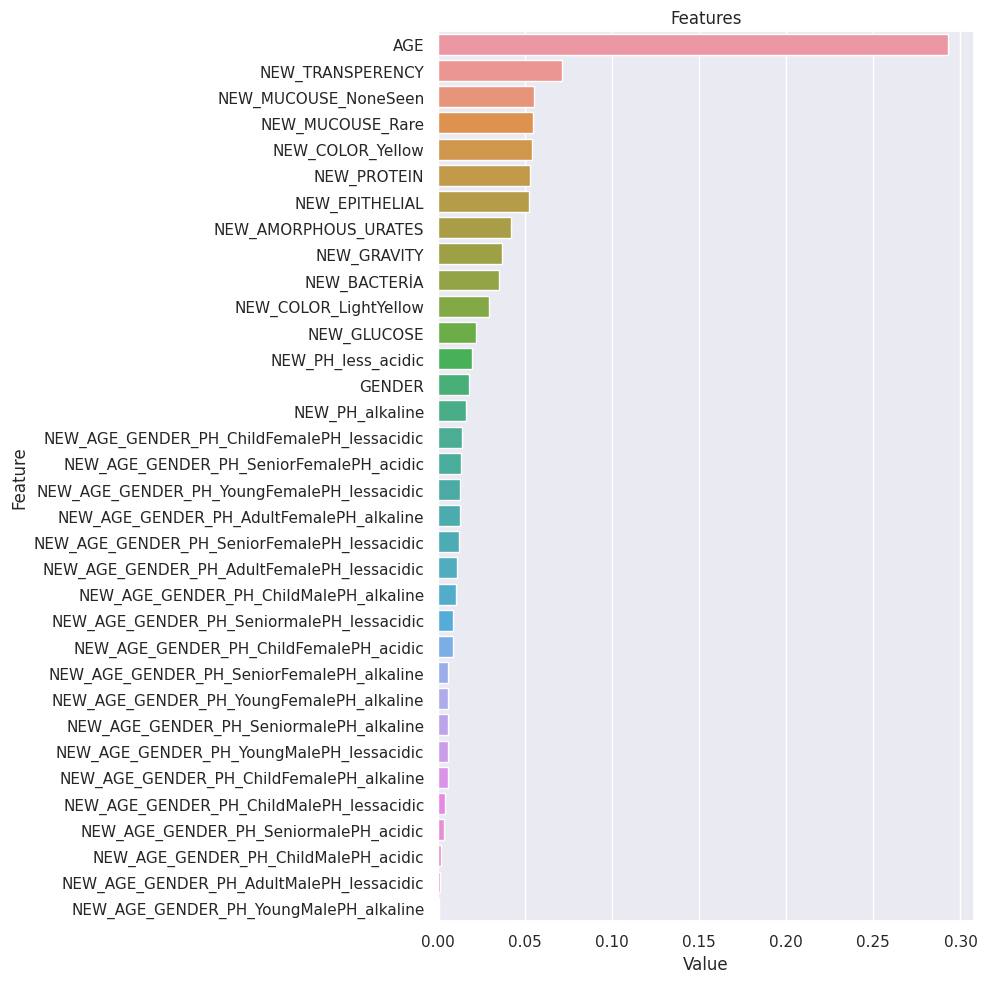

In [92]:
yucaib.plot_importance(rf_model,X, len(X)*10000)

In [93]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

Accuracy: 0.9327
Recall: 0.0
Precision: 0.0
F1: 0.0
Auc: 0.4674


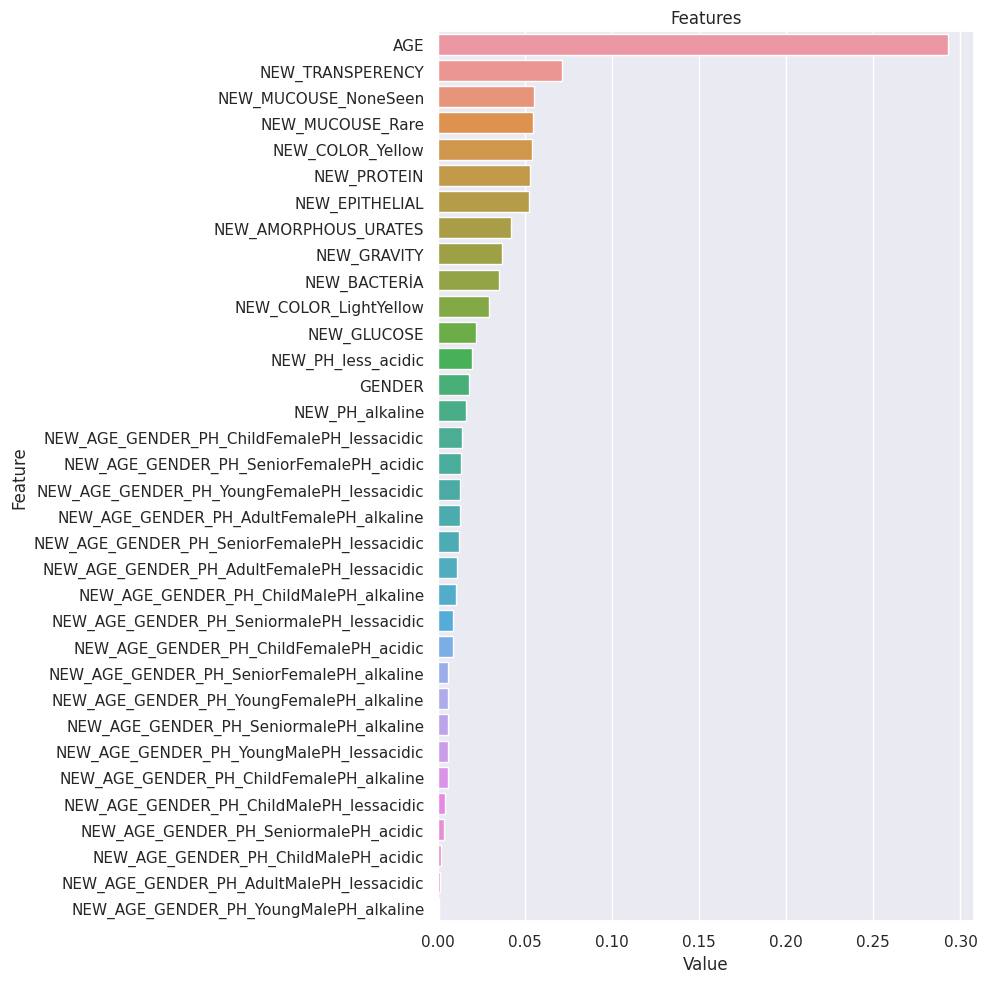

In [94]:
yucaib.plot_importance(rf_model,X, len(X))

#  SMOTE
* with smote we can balance the dataset, the target value, DIAGNOSİS is %94 Negative and %6 Positive.
* To prevent bias we can use SMOTE(Synthetic Minority Over-sampling Technique):
* it will attempts to correct the imbalance in the dataset by augmenting minority class examples with synthetic examples.

In [95]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score


smote = SMOTE(random_state=42)

# SMOTE'u kullanarak eğitim veri setini dengeli hale getirme
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_test_resampled, y_test_resampled = smote.fit_resample(X_test,y_test)

In [96]:
rf_model_smote = RandomForestClassifier(random_state=46).fit(X_train_resampled,y_train_resampled)
y_pred = rf_model.predict(X_test_resampled)
accuracy_score(y_pred,y_test_resampled)

0.5062034739454094

In [97]:
print(f"Accuracy: {accuracy_score(y_pred, y_test_resampled)}")
print(f"Recall: {recall_score(y_pred,y_test_resampled)}")
print(f"Precision: {precision_score(y_pred,y_test_resampled)}")
print(f"F1: {f1_score(y_pred,y_test_resampled)}")
print(f"Auc: {roc_auc_score(y_pred,y_test_resampled)}")

Accuracy: 0.5062034739454094
Recall: 0.8571428571428571
Precision: 0.01488833746898263
F1: 0.02926829268292683
Auc: 0.6801358841408904


In [98]:
X_train.shape

(1005, 34)

In [99]:
X_train_resampled.shape

(1904, 34)

In [100]:
y_train_resampled.shape

(1904,)

In [101]:
np.count_nonzero(y_train_resampled)

952

In [102]:
np.count_nonzero(y_train)

53

In [103]:
y_train.shape

(1005,)

In [104]:
(952* 100)/1904 

50.0

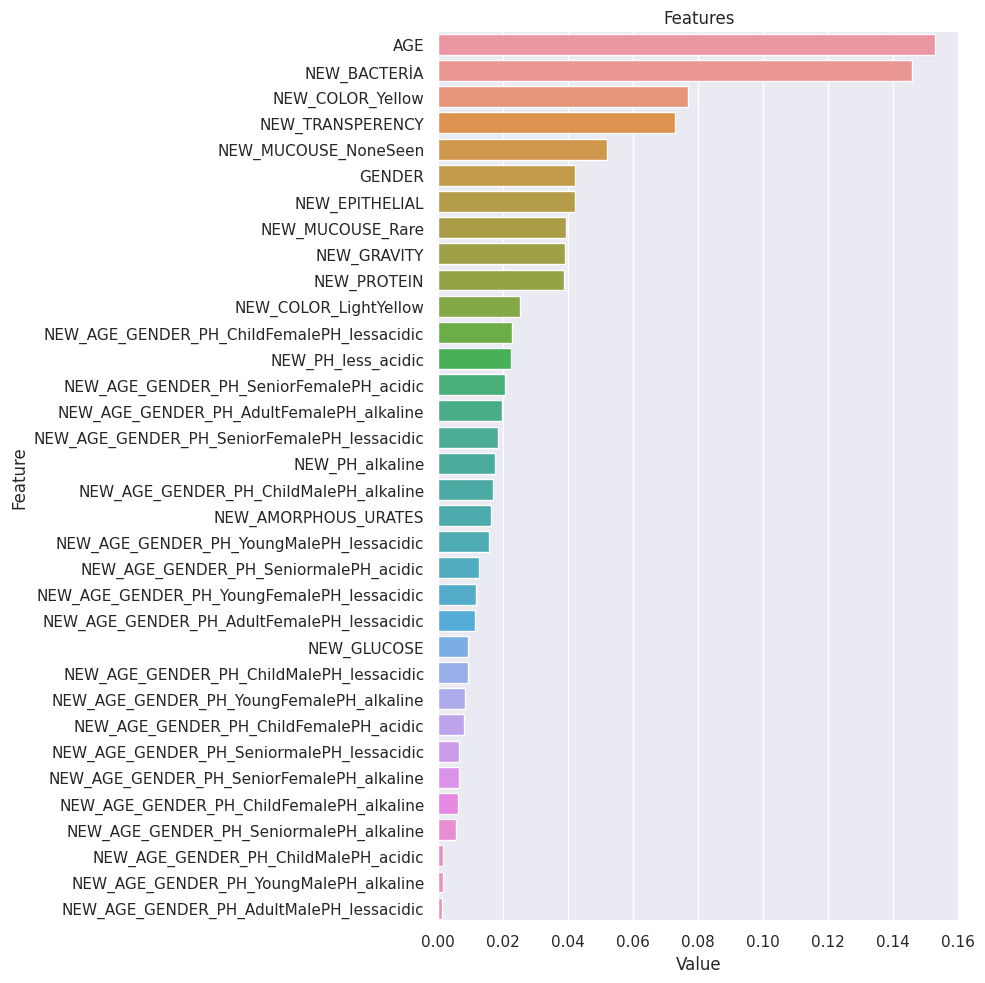

In [105]:
yucaib.plot_importance(rf_model_smote,X, len(X))

# Let's assume we are not that "try-hard study" person and just doing the essentials to fit the data to model.
* How would the feature importances do ?

In [106]:
# read file
dff = pd.read_csv('/kaggle/input/urinalysis-test-results/urinalysis_tests.csv')
#
dropppp= ['RBC','Unnamed: 0','WBC']
dff.drop(dropppp,inplace=True,axis=1) # we already have index column, we don't need another one
# missing val
dff.fillna('LIGHT YELLOW')
# target
dff['Diagnosis'] = dff['Diagnosis'].map({'POSITIVE': 1, 'NEGATIVE': 0})
#binary encode
binary_cols = [col for col in dff.columns if dff[col].dtype not in [int,float] and dff[col].nunique() == 2]
binary_cols = [col for col in binary_cols if 'Diagnosis' not in col]

for col in binary_cols:
    yucaib.label_encoder(dff,col)
# one hot encode
ohe_cols = [col for col in dff.columns if 10 >= dff[col].nunique() > 2]
dff= yucaib.one_hot_encoder(dff,ohe_cols)

# scale
cat_cols, num_cols, cat_but_car = yucaib.grab_col_names(dff)
scaler = StandardScaler()
dff[num_cols] = scaler.fit_transform(dff[num_cols])

# dataset split
y = dff['Diagnosis']
X= dff.drop('Diagnosis', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state= 17)

# Model
rf_model = RandomForestClassifier(random_state=46).fit(X_train,y_train)
y_pred = rf_model.predict(X_test)

# evaluation 
print(f"Accuracy: {accuracy_score(y_pred, y_test)}")
print(f"Recall: {recall_score(y_pred,y_test)}")
print(f"Precision: {precision_score(y_pred,y_test)}")
print(f"F1: {f1_score(y_pred,y_test)}")


Observations: 1436
Variables: 56
cat_cols: 55
cat_but_car: 0
num_cols: 1
num_but_cat: 55
Accuracy: 0.9350348027842227
Recall: 0.0
Precision: 0.0
F1: 0.0


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


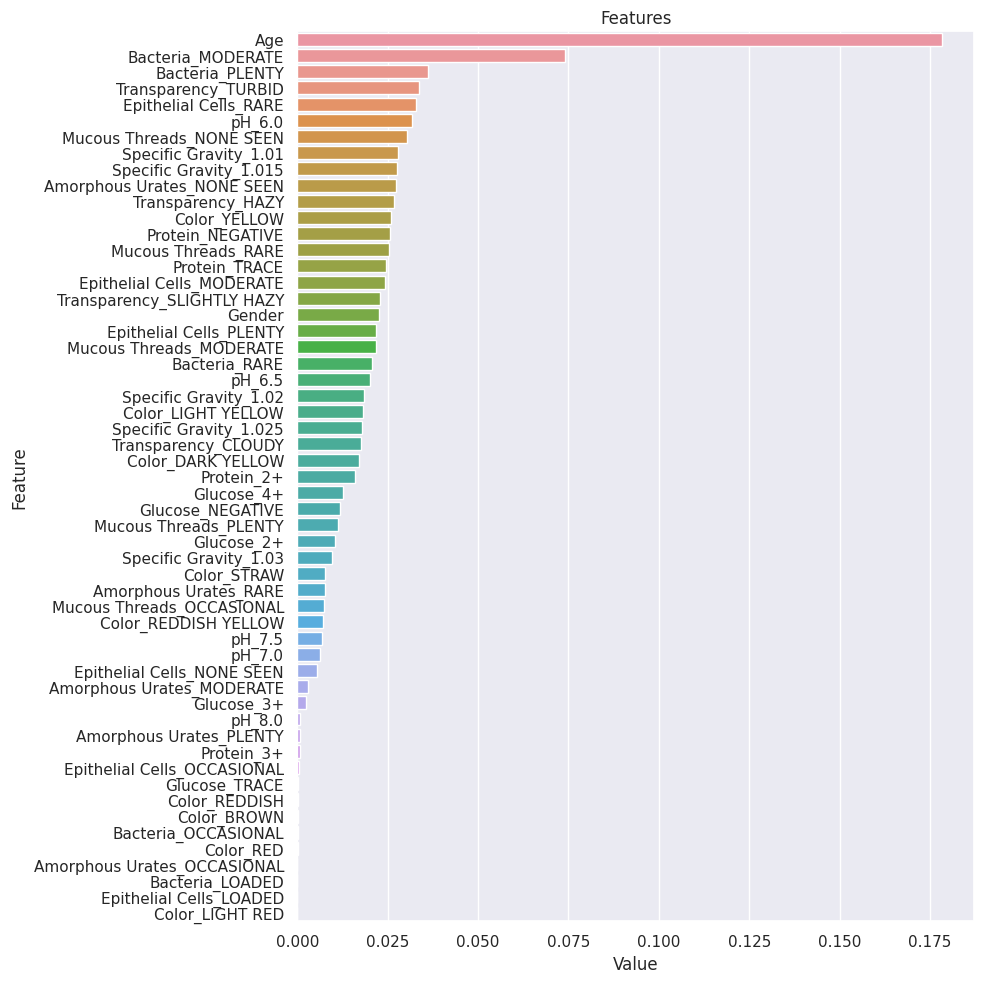

In [107]:
# plot importances
yucaib.plot_importance(rf_model,X, len(X))

# SO WHAT
* we find out, importances of the features for;
* feature extraction done data set
* feature extraction and extended data set
* only essentials done dataset, (label encode, scale, drop, fillna)
---
* the accuracy scores are so high, probobly these scores are missleading, I think percision score is more accurate.
* In this study, the feature engineering didn't made so much difference.
* As my view ; This dataset is not well Normal Disturubited also it kinda need more explanations
* The UTI, urine enfection, is something rare in society. So it is normal that dataset is not meeting the needs.
----
# THANK YOU FOR YOUR READİNG AND CHEKİNG OUT MY STUDY. EVERYTHİNG IN THİS NOTEBOOK ARE MY OWN PERSONAL ACTIONS TOUGHTS. HOPE YOU ENJOYED